In [17]:
import pandas as pd
import pandapower as pp
import pandapower.networks as ppnets
import pandapower.plotting as plt
import matplotlib.pyplot as mplt

In [18]:
net = ppnets.case24_ieee_rts()

In [19]:
net.trafo

,name,std_type,hv_bus,lv_bus,sn_mva,vn_hv_kv,vn_lv_kv,vk_percent,vkr_percent,pfe_kw,...,tap_min,tap_max,tap_step_percent,tap_step_degree,tap_pos,parallel,df,in_service,max_loading_percent,tap_changer_type
0,None,None,23,2,400.0,230.0,138.0,33.572608,0.92,0.0,...,NaN,NaN,3.0,NaN,1,1,1.0,True,100.0,Ratio
1,None,None,10,8,400.0,230.0,138.0,33.572608,0.92,0.0,...,NaN,NaN,3.0,NaN,1,1,1.0,True,100.0,Ratio
2,None,None,11,8,400.0,230.0,138.0,33.572608,0.92,0.0,...,NaN,NaN,3.0,NaN,1,1,1.0,True,100.0,Ratio
3,None,None,10,9,400.0,230.0,138.0,33.572608,0.92,0.0,...,NaN,NaN,2.0,NaN,1,1,1.0,True,100.0,Ratio
4,None,None,11,9,400.0,230.0,138.0,33.572608,0.92,0.0,...,NaN,NaN,2.0,NaN,1,1,1.0,True,100.0,Ratio


In [20]:
net.ext_grid['in_service']=False

In [21]:
net.load.scaling = 1.5

In [22]:
net.gen['vm_pu']=1.045

In [23]:
net.gen.loc[0,'p_mw'] = 120
net.gen.loc[1,'p_mw'] = 100
net.gen.loc[2,'p_mw'] = 100
net.gen.loc[3,'slack'] = True

In [24]:
net.gen.loc[0,'slack_weight'] = -40
net.gen.loc[1,'slack_weight'] = 0
net.gen.loc[2,'slack_weight'] = -6
net.gen.loc[3,'slack_weight'] = -6

In [75]:
net.bus

,name,vn_kv,type,zone,in_service,max_vm_pu,min_vm_pu,geo,coords
0,1,138.0,b,1.0,True,1.05,0.95,"{""coordinates"": [2.7759619498, -1.278020978], ...","[(0.7759619498000001, -1.278020978), (4.775961..."
1,2,138.0,b,1.0,True,1.05,0.95,"{""coordinates"": [2.5012550969, -0.1447433104],...","[(0.5012550969, -0.1447433104), (4.5012550969,..."
2,3,138.0,b,1.0,True,1.05,0.95,"{""coordinates"": [1.9820386365, -2.1490309973],...","[(-0.017961363499999994, -2.1490309973), (3.98..."
3,4,138.0,b,1.0,True,1.05,0.95,"{""coordinates"": [1.61982258, -0.5433284509], ""...","[(-0.3801774200000001, -0.5433284509), (3.6198..."
4,5,138.0,b,1.0,True,1.05,0.95,"{""coordinates"": [1.7811971347, -1.049758788], ...","[(-0.21880286530000004, -1.049758788), (3.7811..."
5,6,138.0,b,2.0,True,1.05,0.95,"{""coordinates"": [1.2749925358, 0.1433862776], ...","[(-0.7250074642, 0.1433862776), (3.2749925358,..."
6,7,138.0,b,2.0,True,1.05,0.95,"{""coordinates"": [-0.4646735958, 0.7036672915],...","[(-2.4646735958, 0.7036672915), (1.5353264042,..."
7,8,138.0,b,2.0,True,1.05,0.95,"{""coordinates"": [0.1067929329, -0.2603906494],...","[(-1.8932070671, -0.2603906494), (2.1067929329..."
8,9,138.0,b,1.0,True,1.05,0.95,"{""coordinates"": [0.8431378211, -1.4711207032],...","[(-1.1568621789, -1.4711207032), (2.8431378211..."
9,10,138.0,b,2.0,True,1.05,0.95,"{""coordinates"": [0.5451378694, -0.950440448], ...","[(-1.4548621306, -0.950440448), (2.5451378694,..."


In [74]:
dx = 2

# geo 열에서 coordinates 값만 추출해서 coords 생성
def generate_coords(geo_str):
    # 문자열에서 좌표만 파싱
    coords_str = geo_str.split('"coordinates": [')[1].split(']')[0]
    x_str, y_str = coords_str.split(',')
    x = float(x_str.strip())
    y = float(y_str.strip())
    # 좌우로 확장된 coords 반환
    return [(x - dx, y), (x + dx, y)]

# coords 열 생성
net.bus['coords'] = net.bus['geo'].apply(generate_coords)

In [26]:
print(net["bus"].index.tolist())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [27]:
pp.runpp(net,numba=False)

In [28]:
gen_mw_total = net.res_gen['p_mw'].sum()
imports_mw_total = net.res_ext_grid['p_mw'].sum()

print('total gen MW :', gen_mw_total + imports_mw_total)
print('total imported gen MW :', imports_mw_total)
print('total local gen MW:', gen_mw_total)
print('total load MW:', net.res_load['p_mw'].sum())

total gen MW : 2754.1216504231197
total imported gen MW : 0.0
total local gen MW: 2754.1216504231197
total load MW: 4275.0


In [29]:
net.gen

,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,slack_weight,type,controllable,max_p_mw,min_p_mw
0,None,0,120.0,1.045,NaN,0.0,10.0,1.0,False,True,-40.0,None,True,20.0,16.0
1,None,1,100.0,1.045,NaN,0.0,10.0,1.0,False,True,0.0,None,True,20.0,16.0
2,None,6,100.0,1.045,NaN,0.0,60.0,1.0,False,True,-6.0,None,True,100.0,25.0
3,None,13,0.0,1.045,NaN,-50.0,200.0,1.0,True,True,-6.0,None,True,0.0,0.0
4,None,14,12.0,1.045,NaN,0.0,6.0,1.0,False,True,0.0,None,True,12.0,2.4
5,None,15,155.0,1.045,NaN,-50.0,80.0,1.0,False,True,0.0,None,True,155.0,54.3
6,None,17,400.0,1.045,NaN,-50.0,200.0,1.0,False,True,0.0,None,True,400.0,100.0
7,None,20,400.0,1.045,NaN,-50.0,200.0,1.0,False,True,0.0,None,True,400.0,100.0
8,None,21,50.0,1.045,NaN,-10.0,16.0,1.0,False,True,0.0,None,True,50.0,10.0
9,None,22,155.0,1.045,NaN,-50.0,80.0,1.0,False,True,0.0,None,True,155.0,54.3


In [30]:
net.res_gen

,p_mw,q_mvar,va_degree,vm_pu
0,120.00000,139.932567,-32.941541,1.045
1,100.00000,134.306392,-33.126481,1.045
2,100.00000,199.383988,-44.277311,1.045
3,1262.12165,299.896130,0.000000,1.045
4,12.00000,288.732407,-6.821298,1.045
5,155.00000,105.833537,-5.473606,1.045
6,400.00000,106.672789,-2.526827,1.045
7,400.00000,-46.624724,-1.471530,1.045
8,50.00000,-41.059680,4.519537,1.045
9,155.00000,263.054577,-8.631356,1.045


In [31]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.045000,-32.941541,-120.00000,-106.932567
1,1.045000,-33.126481,-116.50000,-104.306392
2,0.907486,-30.950095,270.00000,55.500000
3,0.932900,-36.379931,111.00000,22.500000
4,0.968166,-36.517338,106.50000,21.000000
5,0.919526,-40.448575,204.00000,126.552763
6,1.045000,-44.277311,-72.50000,-161.883988
7,0.938489,-45.365858,256.50000,52.500000
8,0.899100,-31.970252,262.50000,54.000000
9,0.932541,-35.005183,292.50000,60.000000


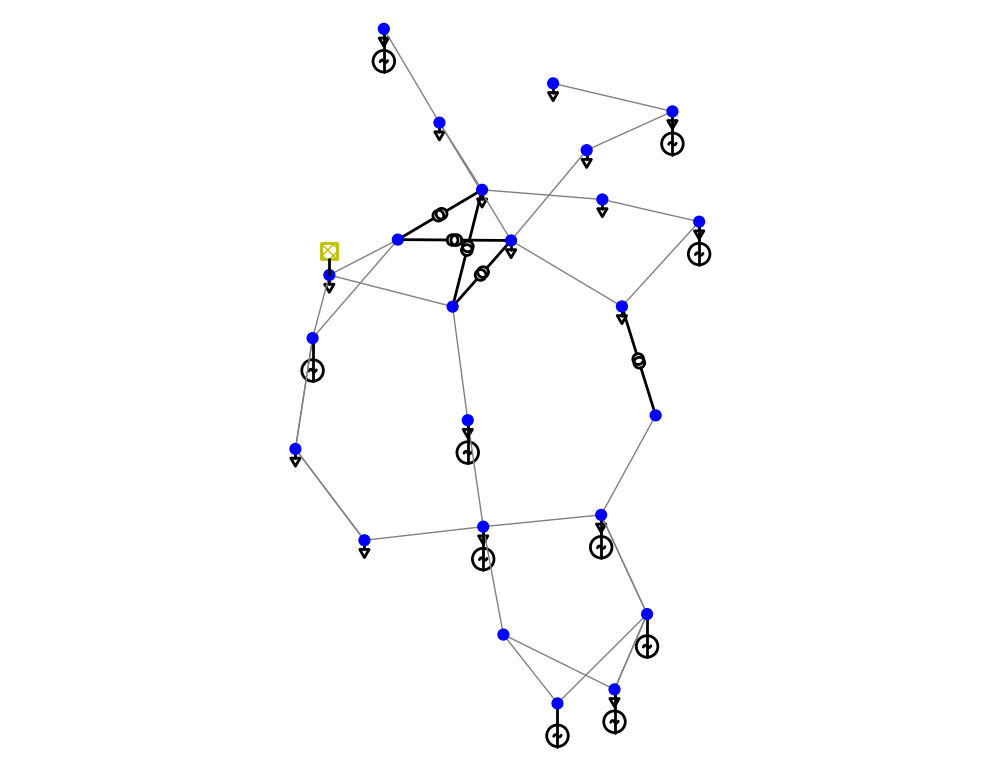

In [76]:
plt.simple_plot(net,  plot_loads=True, plot_gens=True,load_size=1.0, gen_size=2.0);

In [78]:
lines = net.line.index
critical_lines = []
critical_lines_indx = []

vmax = 1.05
vmin = 0.95
line_loading_max = 100

for l in lines:
    print(l)
    net.line.loc[l, 'in_service'] = False
    pp.runpp(net, numba=False)
    if net.res_bus.vm_pu.max()>vmax:
        critical_lines.append([l, 'hv'])
        critical_lines_indx.append(l)
    if net.res_bus.vm_pu.min() < vmin:
        critical_lines.append([l, 'lv'])
        critical_lines_indx.append(l)
    if net.res_line.loading_percent.max() > line_loading_max:
        critical_lines.append([l, 'ol'])
        critical_lines_indx.append(l)
    net.line.loc[l, 'in_service'] = True



0


LoadflowNotConverged: Power Flow nr did not converge after 10 iterations!

In [ ]:
print(critical_lines)

In [ ]:
fig, ax = mplt.subplots()
fig.set_figheight(6)
fig.set_figwidth(8)

critical_lc = plt.create_line_collection(net, critical_lines_indx, color="r", zorder=2) #create lines

plt.draw_collections([critical_lc], ax=ax);
plt.simple_plot(net,  plot_loads=True, plot_gens=True,  ax=ax, show_plot=False);

mplt.show()

In [ ]:
net.gen

In [ ]:
net.line